In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import string


In [3]:
train_data = pd.read_csv('C:/Users/abcd/Desktop/Quality_Thought_File/PROJECTS/Sentiment Analysis/train.tsv',sep='\t')
test_data = pd.read_csv('C:/Users/abcd/Desktop/Quality_Thought_File/PROJECTS/Sentiment Analysis/train.tsv',sep='\t')


In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
train_data['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

# create new column with if and for loop with the Sentiment Phrase column


In [12]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('somewhat negative')
    elif row == 2:
        Sentiment_words.append('neutral')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words



# count values of Sentiment Phrase

In [13]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

somewhat positive    32927
neutral              79582
positive              9206
negative              7072
somewhat negative    27273
dtype: int64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 5 columns):
PhraseId           156060 non-null int64
SentenceId         156060 non-null int64
Phrase             156060 non-null object
Sentiment          156060 non-null int64
Sentiment_words    156060 non-null object
dtypes: int64(3), object(2)
memory usage: 6.0+ MB


# some visually for Sentiment phrase

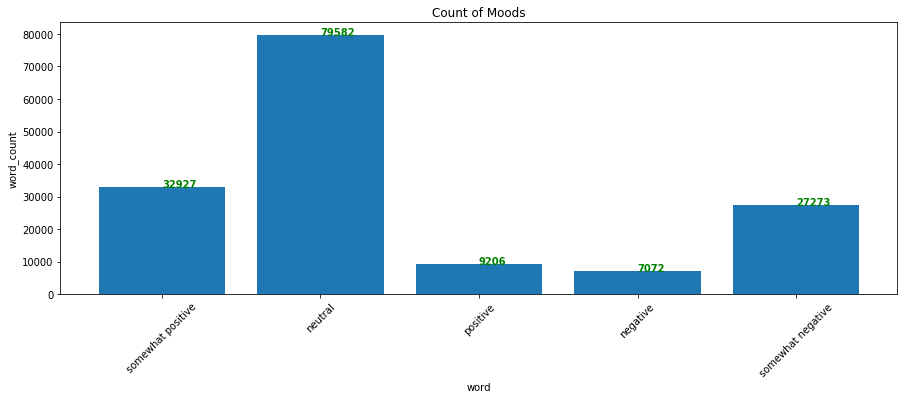

In [14]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['somewhat positive','neutral','positive','negative','somewhat negative'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')


In [15]:
text = train_data['Phrase']
text

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [16]:
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct


In [17]:
train_data.head()
train_data.tail()

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_words
156055,156056,8544,Hearst 's,2,neutral
156056,156057,8544,forced avuncular chortles,1,somewhat negative
156057,156058,8544,avuncular chortles,3,somewhat positive
156058,156059,8544,avuncular,2,neutral
156059,156060,8544,chortles,2,neutral


In [18]:
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct
    

# function to clean the column Phrase in the data set


In [19]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))


# run the function in train and test data set


In [20]:
corpus1 = []
for i in range(0, 156060):
    corpus1.append(review_to_words(train_data['Phrase'][i]))

# create new column and merge it with the new cleaning list 

In [18]:
train_data['new_Phrase']=corpus1


# drop the old column

In [19]:
train_data.drop(['Phrase'],axis=1,inplace=True)

In [21]:
train_data.head()
train_data.tail()

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_Phrase
156055,156056,8544,2,somewhat negative,hearst
156056,156057,8544,1,neutral,forced avuncular chortle
156057,156058,8544,3,somewhat positive,avuncular chortle
156058,156059,8544,2,somewhat negative,avuncular
156059,156060,8544,2,somewhat negative,chortle


# i do it with positive Sentiment and easly o reapte it to the rest of Sentiment words 

# select positive Sentiment from data set 

In [22]:
positive=train_data[train_data['Sentiment_words']==('positive')]

# prepare the data to split it 

In [47]:

words = ' '.join(positive['new_Phrase'])
split_word = " ".join([word for word in words.split()])

In [48]:
train_data.tail()

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_Phrase
156055,156056,8544,2,somewhat negative,hearst
156056,156057,8544,1,neutral,forced avuncular chortle
156057,156058,8544,3,somewhat positive,avuncular chortle
156058,156059,8544,2,somewhat negative,avuncular
156059,156060,8544,2,somewhat negative,chortle


# prepare the data to visual  it 

In [49]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

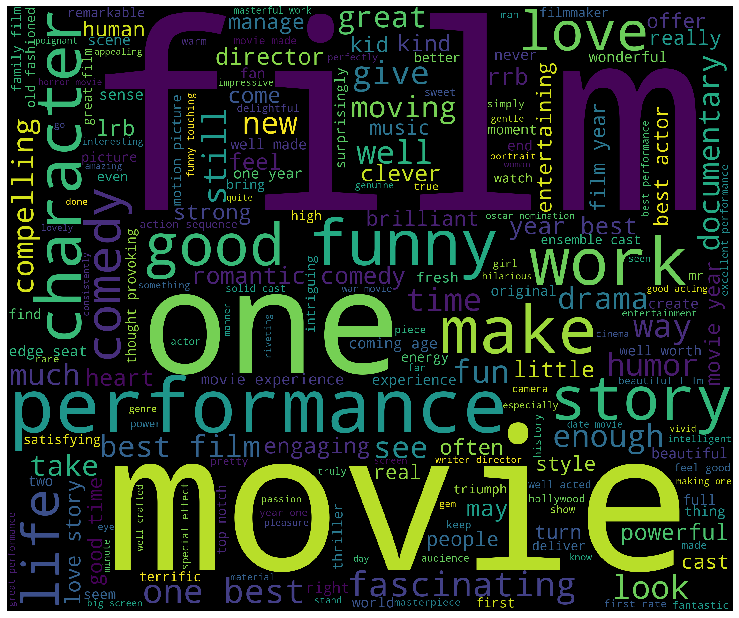

In [32]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# now here some steps to count every word in postive Sentiment 

In [50]:
pos=positive['new_Phrase']

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000) 

ImportError: DLL load failed: The specified procedure could not be found.

In [ ]:
pos_words = vectorizer.fit_transform(pos)


In [ ]:
pos_words = pos_words.toarray()

In [ ]:
pos= vectorizer.get_feature_names()

In [ ]:
pos

In [ ]:
print (pos_words.shape)


In [ ]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count) 

In [ ]:
postive_new= pd.DataFrame(dist)

In [ ]:
postive_new.columns=['word_count']

In [ ]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [ ]:
postive_new1=postive_new[['word','word_count']]

In [ ]:
postive_new1.head()

In [ ]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [ ]:
top_30_words.head(30)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values


# time to predict

# using multinomial Naive Bayes due it is  go good for discrete features , in our case we have 5 features 

In [ ]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)







In [ ]:
mse = ((y_pred - y_test) ** 2).mean()



In [ ]:
#mean square error 

In [ ]:
mse

In [ ]:
rmse = sqrt(mse)

In [ ]:
#root mean squre error

In [ ]:
rmse